In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

from utils import *

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
height = 256
aspect_ratio = 16/9
width = int(height * aspect_ratio)
img = Image(width, height)

In [4]:
img.data[:, :, 0] = img.xs
img.data[:, :, 1] = img.ys
img.data[:, :, 2] = 0.25
img.n_samples += 1

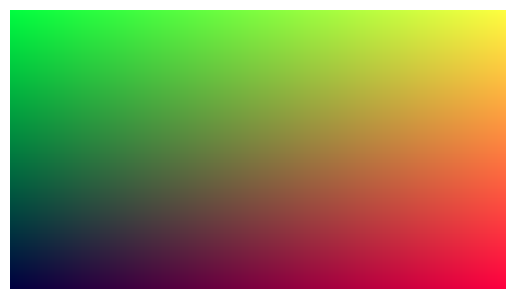

In [5]:
img.display(gamma=1)

In [6]:
aspect_ratio = 16 / 9
width = 400
height = int(width / aspect_ratio)
img = Image(width, height)
vfov = np.pi/2
lookfrom = np.zeros(3)
lookat = np.array([0, 0, -1])
vup = np.array([0, 1, 0])
aperture = 0
focus_dist = np.linalg.norm(lookfrom-lookat)
camera = Camera(
  lookfrom,
  lookat,
  vup,
  aspect_ratio,
  vfov,
  aperture,
  focus_dist
)

In [7]:
start_color = np.array([1, 1, 1])
end_color = np.array([0.5, 0.7, 1])
def ray_color(ray, world):
  d = ray.unit_norm_direction()
  t = (d[1] + 1) / 2
  color = (1-t)*start_color + t*end_color
  return color
world = None

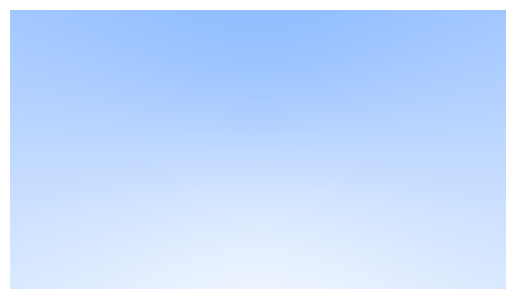

In [8]:
img.reset()
img.raytrace(ray_color, world, camera)
img.display(gamma=1)

In [9]:
center = np.array([0, 0, -1])
radius = 0.5

In [10]:
def hit_sphere(center, radius, ray):
  oc = ray.origin - center
  a = ray.direction.dot(ray.direction)
  b = 2 * ray.direction.dot(oc)
  c = oc.dot(oc) - radius**2
  discriminant = b**2 - 4*a*c
  return discriminant >= 0

In [11]:
sphere_color = np.array([1, 0, 0])

In [12]:
def ray_color(ray, world):
  if hit_sphere(center, radius, ray):
    return sphere_color
  d = ray.unit_norm_direction()
  t = (d[1] + 1) / 2
  color = (1-t)*start_color + t*end_color
  return color
world = None

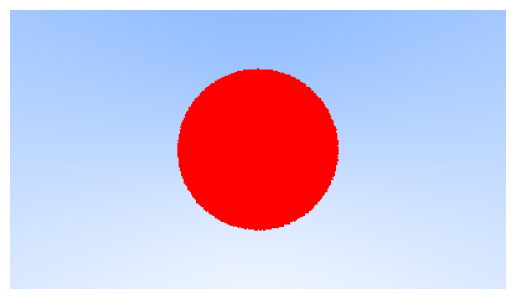

In [13]:
img.reset()
img.raytrace(ray_color, world, camera)
img.display(gamma=1)

In [14]:
def hit_sphere(center, radius, ray):
  oc = ray.origin - center
  a = ray.direction.dot(ray.direction)
  b = 2 * ray.direction.dot(oc)
  c = oc.dot(oc) - radius**2
  discriminant = b**2 - 4*a*c
  if discriminant < 0:
    return None
  else:
    t = (-b-np.sqrt(discriminant))/(2*a)
    return t

In [15]:
def ray_color(ray, world):
  hit_t = hit_sphere(center, radius, ray)
  if hit_t is not None:
    hit_point = ray.at(hit_t)
    normal = hit_point - center
    normal /= np.linalg.norm(normal)
    return (normal + 1) / 2
  d = ray.unit_norm_direction()
  t = (d[1] + 1) / 2
  color = (1-t)*start_color + t*end_color
  return color
world = None

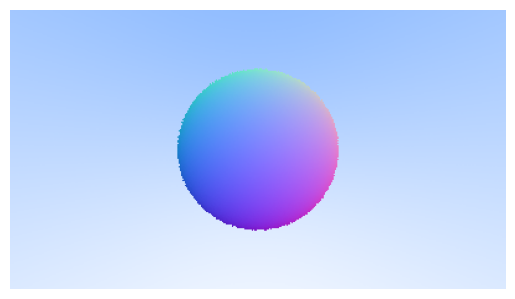

In [16]:
img.reset()
img.raytrace(ray_color, world, camera)
img.display(gamma=1)

In [17]:
def hit_sphere(center, radius, ray):
  oc = ray.origin - center
  a = ray.direction.dot(ray.direction)
  h = ray.direction.dot(oc)
  c = oc.dot(oc) - radius**2
  discriminant = h**2 - a*c
  if discriminant < 0:
    return None
  else:
    t = (-h-np.sqrt(discriminant))/a
    return t
world = None

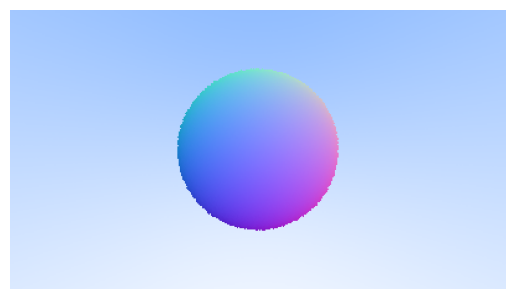

In [18]:
img.reset()
img.raytrace(ray_color, world, camera)
img.display(gamma=1)

In [19]:
lambertian = Lambertian(0.5)
spheres = []
spheres.append(Sphere(np.array([0, 0, -1]), 0.5, lambertian))
spheres.append(Sphere(np.array([0, -100.5, -1]), 100, lambertian))

In [20]:
world = HittableList(spheres)

In [21]:
def ray_color(ray, world):
  rec = world.hit(ray, 0, np.infty)
  if rec is not None:
    return (rec.normal + 1) / 2
  d = ray.unit_norm_direction()
  t = (d[1] + 1) / 2
  color = (1-t)*start_color + t*end_color
  return color

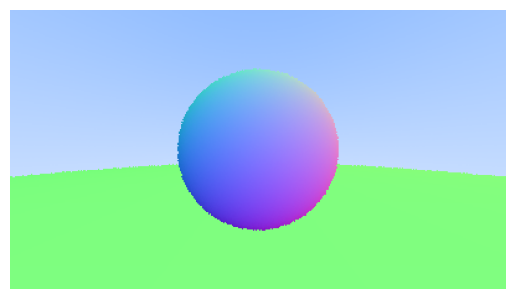

In [22]:
img.reset()
img.raytrace(ray_color, world, camera)
img.display(gamma=1)

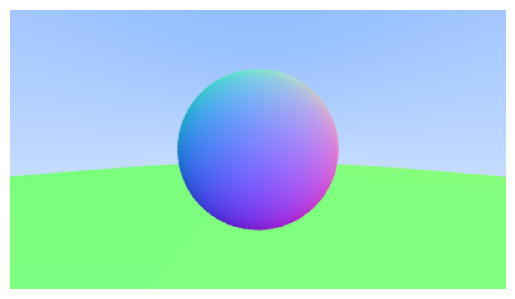

In [23]:
img.reset()
img.raytrace(ray_color, world, camera, n_samples=10)
img.display(gamma=1)

In [24]:
MAXIMUM_DEPTH = 50
def ray_color(ray, world, depth=MAXIMUM_DEPTH):
  if depth <= 0:
    return np.zeros(3)
  rec = world.hit(ray, 0, np.infty)
  if rec is not None:
    target = rec.p + rec.normal + sample_in_unit_sphere()
    return ray_color(Ray(rec.p, target - rec.p), world, depth-1) / 2
  d = ray.unit_norm_direction()
  t = (d[1] + 1) / 2
  color = (1-t)*start_color + t*end_color
  return color

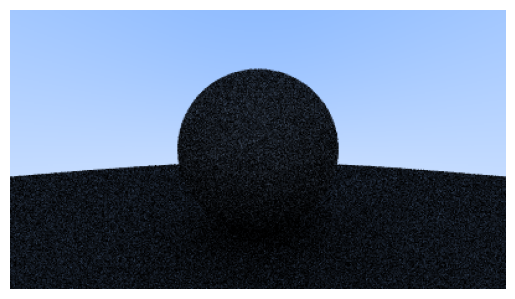

In [25]:
img.reset()
img.raytrace(ray_color, world, camera, n_samples=10)
img.display(gamma=1)

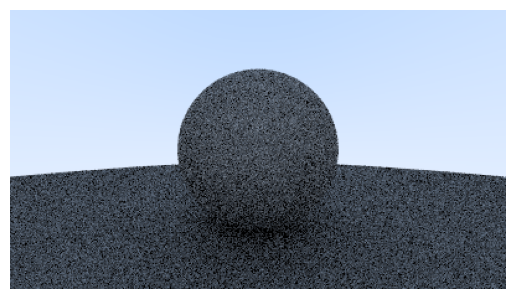

In [26]:
img.reset()
img.raytrace(ray_color, world, camera, n_samples=10)
img.display()

In [27]:
def ray_color(ray, world, depth=MAXIMUM_DEPTH):
  if depth <= 0:
    return np.zeros(3)
  rec = world.hit(ray, 1e-3, np.infty)
  if rec is not None:
    sc = rec.material.scatter(ray, rec)
    if sc is not None:
      scattered, attenuation = sc
      return ray_color(scattered, world, depth-1) * attenuation
    else:
      return np.zeros(3)
  d = ray.unit_norm_direction()
  t = (d[1] + 1) / 2
  color = (1-t)*start_color + t*end_color
  return color

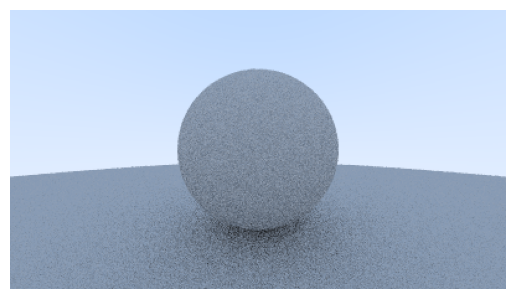

In [28]:
img.reset()
img.raytrace(ray_color, world, camera, n_samples=10)
img.display()

In [29]:
material_ground = Lambertian(np.array([0.8, 0.8, 0]))
material_center = Lambertian(np.array([0.7, 0.3, 0.3]))
material_left = Metal(np.array([0.8, 0.8, 0.8]), 0.3)
material_right = Metal(np.array([0.8, 0.6, 0.2]), 1)
spheres = []
spheres.append(Sphere(np.array([0, -100.5, -1]), 100, material_ground))
spheres.append(Sphere(np.array([0, 0, -1]), 0.5, material_center))
spheres.append(Sphere(np.array([-1, 0, -1]), 0.5, material_left))
spheres.append(Sphere(np.array([1, 0, -1]), 0.5, material_right))
world = HittableList(spheres)

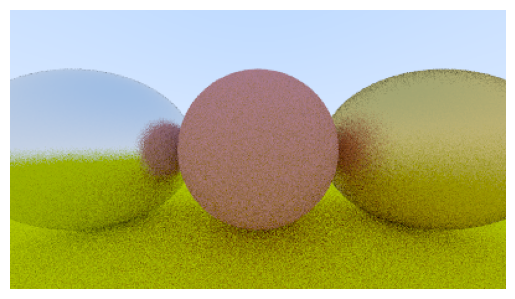

In [30]:
img.reset()
img.raytrace(ray_color, world, camera, n_samples=10)
img.display()

In [31]:
material_ground = Lambertian(np.array([0.8, 0.8, 0]))
material_center = Dielectric(1.5)
material_left = Dielectric(1.5)
material_right = Metal(np.array([0.8, 0.6, 0.2]), 1)
spheres = []
spheres.append(Sphere(np.array([0, -100.5, -1]), 100, material_ground))
spheres.append(Sphere(np.array([0, 0, -1]), 0.5, material_center))
spheres.append(Sphere(np.array([-1, 0, -1]), 0.5, material_left))
spheres.append(Sphere(np.array([1, 0, -1]), 0.5, material_right))
world = HittableList(spheres)

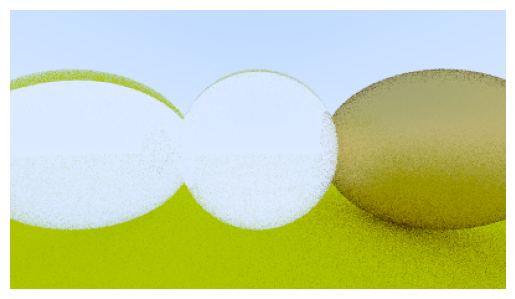

In [32]:
img.reset()
img.raytrace(ray_color, world, camera, n_samples=10)#0)
img.display()

In [33]:
material_ground = Lambertian(np.array([0.8, 0.8, 0]))
material_center = Lambertian(np.array([0.1, 0.2, 0.5]))
material_left = Dielectric(1.5)
material_right = Metal(np.array([0.8, 0.6, 0.2]), 0)
spheres = []
spheres.append(Sphere(np.array([0, -100.5, -1]), 100, material_ground))
spheres.append(Sphere(np.array([0, 0, -1]), 0.5, material_center))
spheres.append(Sphere(np.array([-1, 0, -1]), 0.5, material_left))
spheres.append(Sphere(np.array([1, 0, -1]), 0.5, material_right))
world = HittableList(spheres)

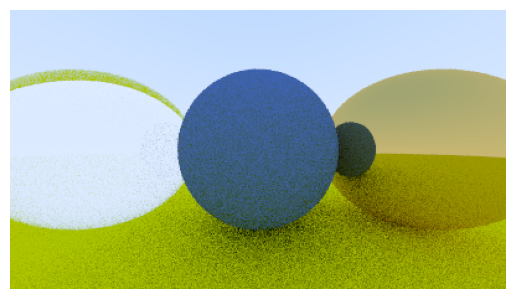

In [34]:
img.reset()
img.raytrace(ray_color, world, camera, n_samples=10)
img.display()

In [35]:
spheres = []
spheres.append(Sphere(np.array([0, -100.5, -1]), 100, material_ground))
spheres.append(Sphere(np.array([0, 0, -1]), 0.5, material_center))
spheres.append(Sphere(np.array([-1, 0, -1]), 0.5, material_left))
spheres.append(Sphere(np.array([-1, 0, -1]), -0.4, material_left))
spheres.append(Sphere(np.array([1, 0, -1]), 0.5, material_right))
world = HittableList(spheres)

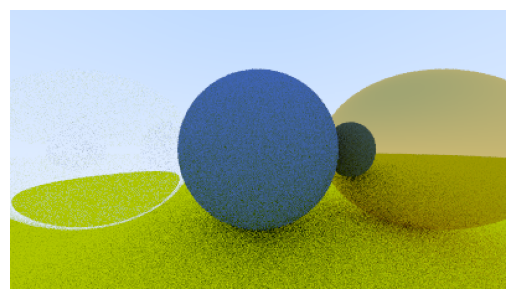

In [36]:
img.reset()
img.raytrace(ray_color, world, camera, n_samples=10)
img.display()

In [37]:
material_left = Lambertian(np.array([0, 0, 1]))
material_right = Lambertian(np.array([1, 0, 0]))
R = np.cos(np.pi/4)
spheres = []
spheres.append(Sphere(np.array([-R, 0, -1]), R, material_left))
spheres.append(Sphere(np.array([R, 0, -1]), R, material_right))
world = HittableList(spheres)

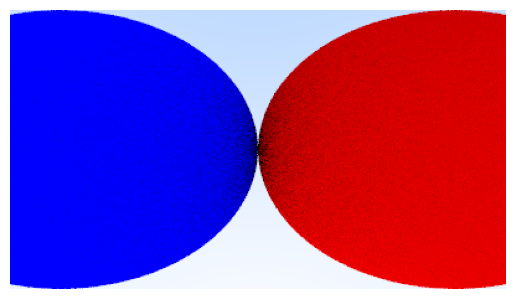

In [38]:
img.reset()
img.raytrace(ray_color, world, camera, n_samples=10)
img.display()

In [39]:
material_ground = Lambertian(np.array([0.8, 0.8, 0]))
material_center = Lambertian(np.array([0.1, 0.2, 0.5]))
material_left = Dielectric(1.5)
material_right = Metal(np.array([0.8, 0.6, 0.2]), 0)
spheres = []
spheres.append(Sphere(np.array([0, -100.5, -1]), 100, material_ground))
spheres.append(Sphere(np.array([0, 0, -1]), 0.5, material_center))
spheres.append(Sphere(np.array([-1, 0, -1]), 0.5, material_left))
spheres.append(Sphere(np.array([-1, 0, -1]), -0.45, material_left))
spheres.append(Sphere(np.array([1, 0, -1]), 0.5, material_right))
world = HittableList(spheres)

In [40]:
lookfrom = np.array([-2, 2, 1])
lookat = np.array([0, 0, -1])
vup = np.array([0, 1, 0])
vfov = np.pi/2
aperture = 0
focus_dist = np.linalg.norm(lookfrom-lookat)
camera = Camera(
  lookfrom,
  lookat,
  vup,
  aspect_ratio,
  vfov,
  aperture,
  focus_dist
)

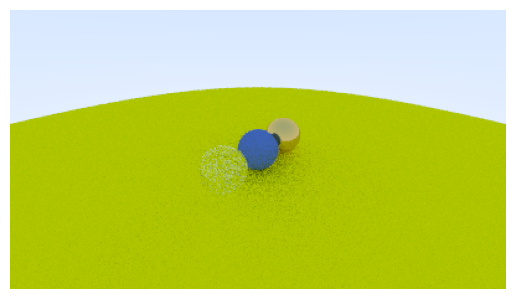

In [41]:
img.reset()
img.raytrace(ray_color, world, camera, n_samples=10)
img.display()

In [42]:
lookfrom = np.array([-2, 2, 1])
lookat = np.array([0, 0, -1])
vup = np.array([0, 1, 0])
vfov = 20/360*2*np.pi
aperture = 0
focus_dist = np.linalg.norm(lookfrom-lookat)
camera = Camera(
  lookfrom,
  lookat,
  vup,
  aspect_ratio,
  vfov,
  aperture,
  focus_dist
)

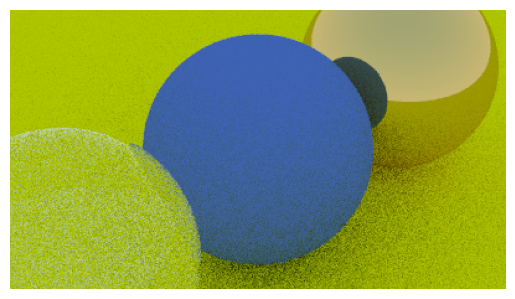

In [43]:
img.reset()
img.raytrace(ray_color, world, camera, n_samples=10)
img.display()

In [44]:
lookfrom = np.array([3, 3, 2])
lookat = np.array([0, 0, -1])
vup = np.array([0, 1, 0])
vfov = 20/360*2*np.pi
aperture = 2
focus_dist = np.linalg.norm(lookfrom-lookat)
camera = Camera(
  lookfrom,
  lookat,
  vup,
  aspect_ratio,
  vfov,
  aperture,
  focus_dist
)

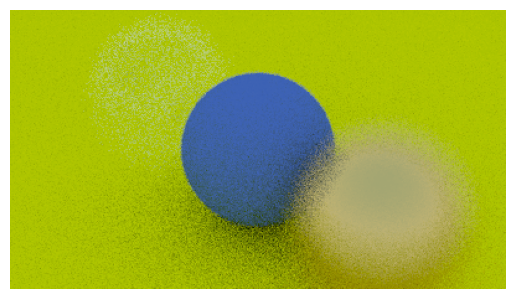

In [45]:
img.reset()
img.raytrace(ray_color, world, camera, n_samples=10)
img.display()

In [46]:
start_color = np.array([1, 1, 1])
end_color = np.array([0.5, 0.7, 1])
MAXIMUM_DEPTH = 50
def ray_color(ray, world, depth=MAXIMUM_DEPTH):
  if depth <= 0:
    return np.zeros(3)
  rec = world.hit(ray, 1e-3, np.infty)
  if rec is not None:
    sc = rec.material.scatter(ray, rec)
    if sc is not None:
      scattered, attenuation = sc
      return ray_color(scattered, world, depth-1) * attenuation
    else:
      return np.zeros(3)
  d = ray.unit_norm_direction()
  t = (d[1] + 1) / 2
  color = (1-t)*start_color + t*end_color
  return color

In [47]:
ground_material = Lambertian(np.array([0.5, 0.5, 0.5]))
spheres = []
spheres.append(Sphere(np.array([0, -1000, 0]), 1000, ground_material))
for x in range(-11, 11):
  for y in range(-11, 11):
    choose_mat = np.random.random()
    center = np.array([
      x + 0.9 * np.random.random(),
      0.2,
      y + 0.9 * np.random.random()
    ])
    if np.linalg.norm(center - np.array([4, 0.2, 0])) > 0.9:
      if choose_mat < 0.8:
        albedo = np.random.random(3) * np.random.random(3)
        sphere_material = Lambertian(albedo)
      elif choose_mat < 0.95:
        albedo = np.random.random(3) * 0.5 + 0.5
        fuzz = np.random.random() * 0.5
        sphere_material = Metal(albedo, fuzz)
      else:
        sphere_material = Dielectric(1.5)
    spheres.append(Sphere(center, 0.2, sphere_material))
material1 = Dielectric(1.5)
spheres.append(Sphere(np.array([0, 1, 0]), 1, material1))
material2 = Lambertian(np.array([0.4, 0.2, 0.1]))
spheres.append(Sphere(np.array([-4, 1, 0]), 1, material2))
material3 = Metal(np.array([0.7, 0.6, 0.5]), 0)
spheres.append(Sphere(np.array([4, 1, 0]), 1, material3))
world = HittableList(spheres)

In [48]:
aspect_ratio = 3 / 2
width = 400
height = int(width / aspect_ratio)
img = Image(width, height)

In [49]:
lookfrom = np.array([13, 2, 3])
lookat = np.zeros(3)
vup = np.array([0, 1, 0])
vfov = 20/360*2*np.pi
focus_dist = 10
aperture = 0.1
camera = Camera(
  lookfrom,
  lookat,
  vup,
  aspect_ratio,
  vfov,
  aperture,
  focus_dist
)

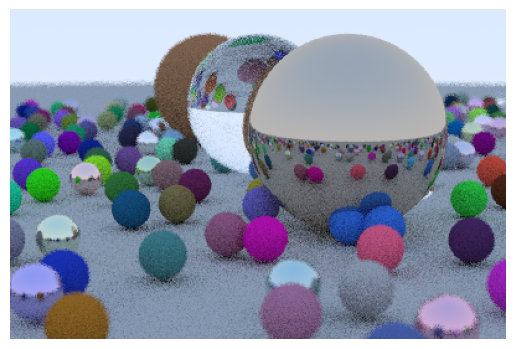

In [50]:
img.reset()
img.raytrace(ray_color, world, camera, n_samples=10)
img.display()